In [12]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# --- Cargar splits ---
X_train = pd.read_csv(r"C:\Users\Luis Arbio\Documents\Hoteles\data\Processed\X_train.csv")
X_test = pd.read_csv(r"C:\Users\Luis Arbio\Documents\Hoteles\data\Processed\X_test.csv")
y_train = pd.read_csv(r"C:\Users\Luis Arbio\Documents\Hoteles\data\Processed\y_train.csv").squeeze()
y_test = pd.read_csv(r"C:\Users\Luis Arbio\Documents\Hoteles\data\Processed\y_test.csv").squeeze()

In [14]:
# --- Cargar modelo RandomForest optimizado ---
best_rf = joblib.load(r"C:\Users\Luis Arbio\Documents\Hoteles\data\Processed\best_rf_model.pkl")


In [15]:
# --- Predicciones ---
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)
y_train_proba = best_rf.predict_proba(X_train)[:,1]
y_test_proba = best_rf.predict_proba(X_test)[:,1]


In [16]:
# --- Métricas ---
print("Train Metrics:\n", classification_report(y_train, y_train_pred))
print("Test Metrics:\n", classification_report(y_test, y_test_pred))
print("ROC AUC Train:", roc_auc_score(y_train, y_train_proba))
print("ROC AUC Test:", roc_auc_score(y_test, y_test_proba))

Train Metrics:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     19512
           1       0.95      0.91      0.93      9508

    accuracy                           0.96     29020
   macro avg       0.95      0.94      0.95     29020
weighted avg       0.96      0.96      0.96     29020

Test Metrics:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4878
           1       0.88      0.81      0.85      2377

    accuracy                           0.90      7255
   macro avg       0.90      0.88      0.89      7255
weighted avg       0.90      0.90      0.90      7255

ROC AUC Train: 0.9938961599071185
ROC AUC Test: 0.9565182199991962


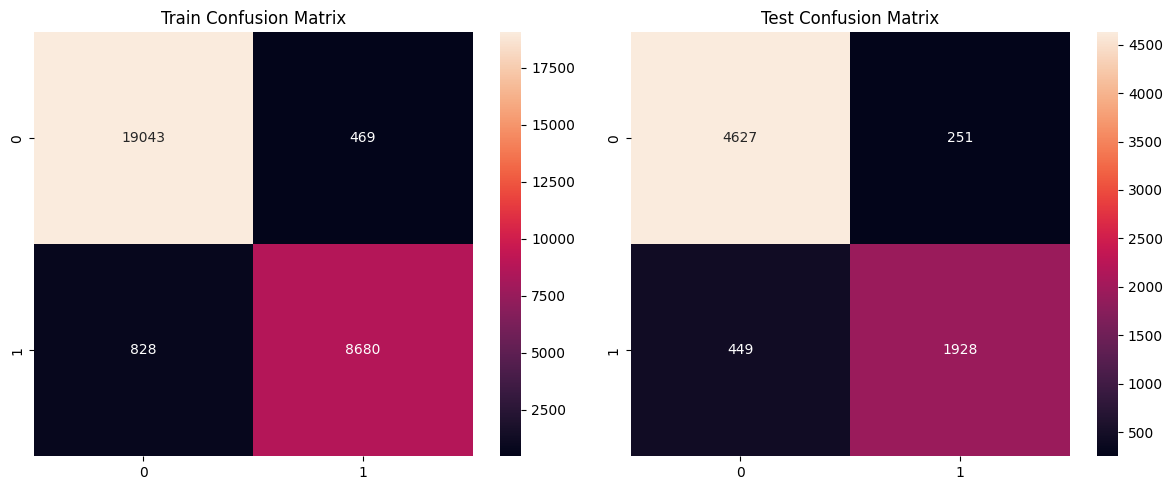

In [17]:
# --- Matrices de confusión ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("Train Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("Test Confusion Matrix")
plt.tight_layout()
plt.show()